# AIN 214 PA3 on Data Prepocessing and Regression

# THE STUDENT INFO
## Student Name: Abdullah Edik
## Student ID: 2220765031

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
# Replace 'path_to_dataset' with the actual file path
path_to_dataset = 'housing.csv'
housing_df = pd.read_csv(path_to_dataset)

# We will deal with the famous California Housing Prices dataset from Kaggle. [1]

# 1. Data Preprocessing (50 Pts)

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values
* Visualize the features with any relevant plots to understand the distribution of data
* Visualize the target variable with respect to the features 
* Visualize the correlation between the features using a heatmap
* Comment on any findings

Before:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


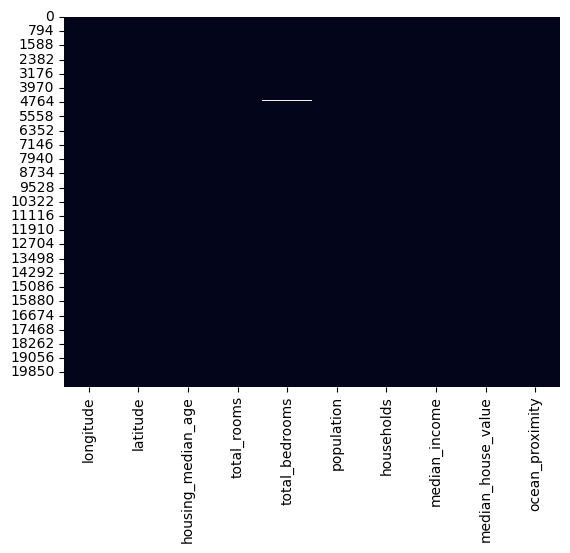

After:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [2]:
# Missing values
print("Before:\n", housing_df.isnull().sum())
# Visualization of missing values
sns.heatmap(housing_df.isnull(), cbar=False)
plt.show()
# Drop the missing values
housing_df = housing_df.dropna()
print("After:\n", housing_df.isnull().sum())

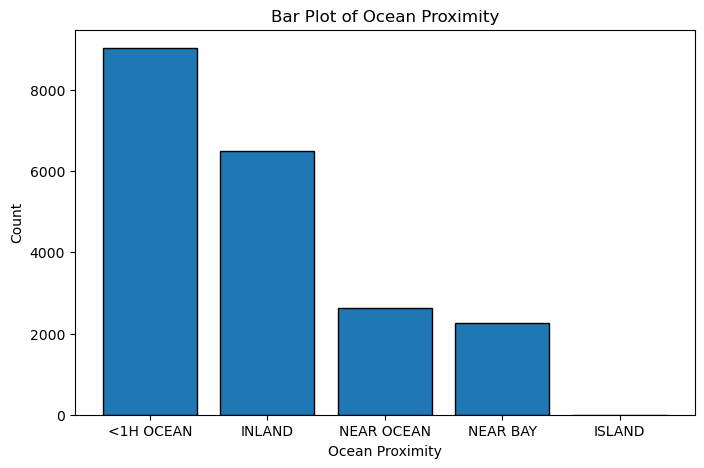

In [3]:
plt.figure(figsize=(8,5))
ocean_counts = housing_df['ocean_proximity'].value_counts()
plt.bar(ocean_counts.index, ocean_counts, edgecolor='black')
plt.title("Bar Plot of Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Count")
plt.show()

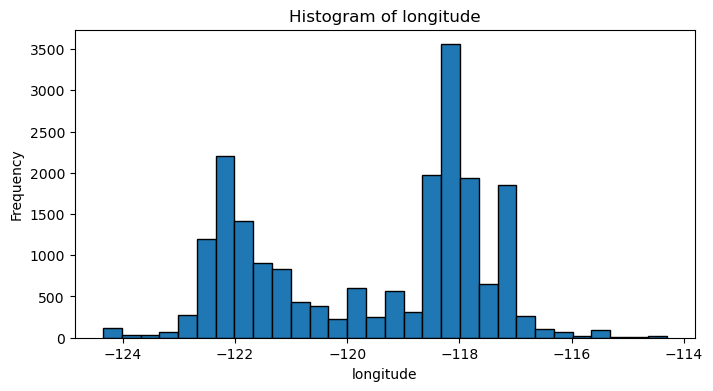

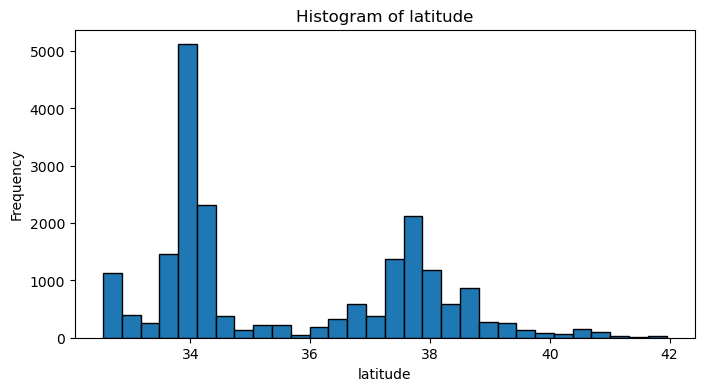

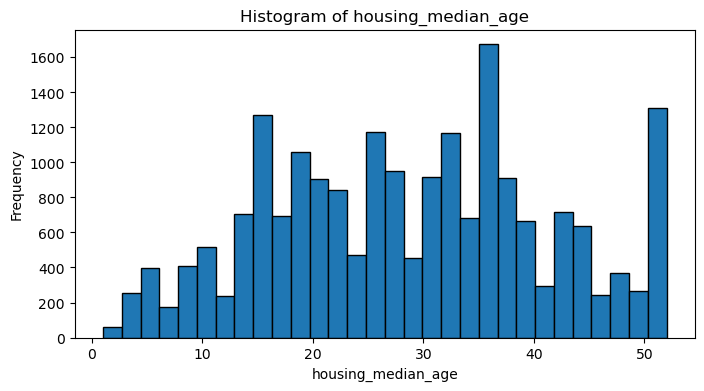

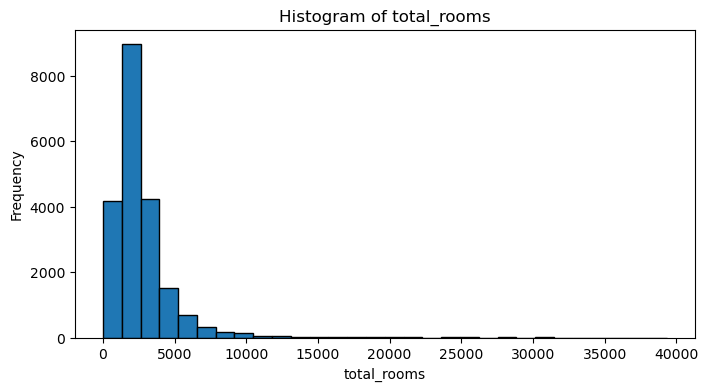

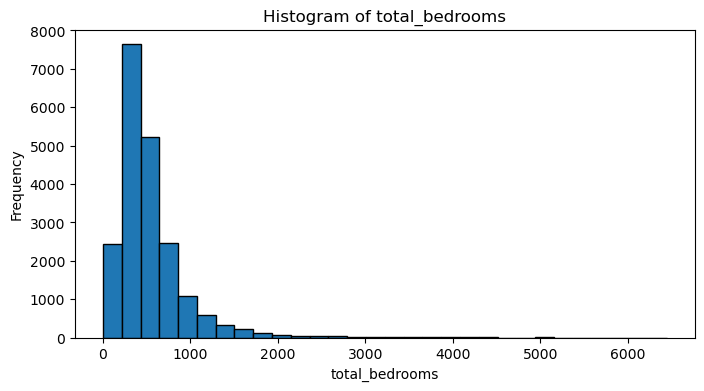

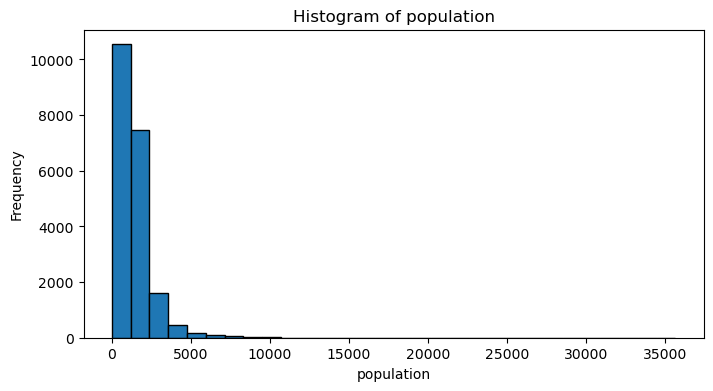

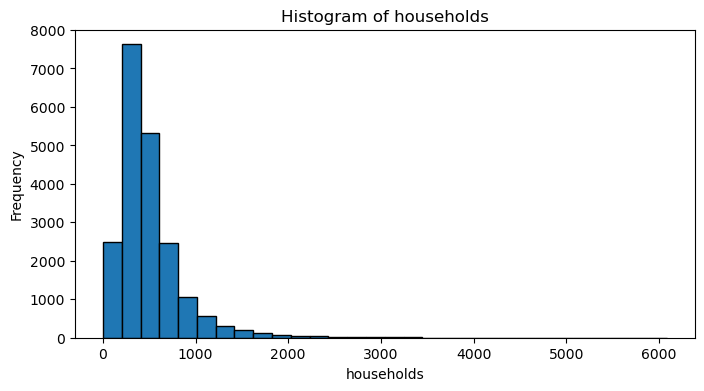

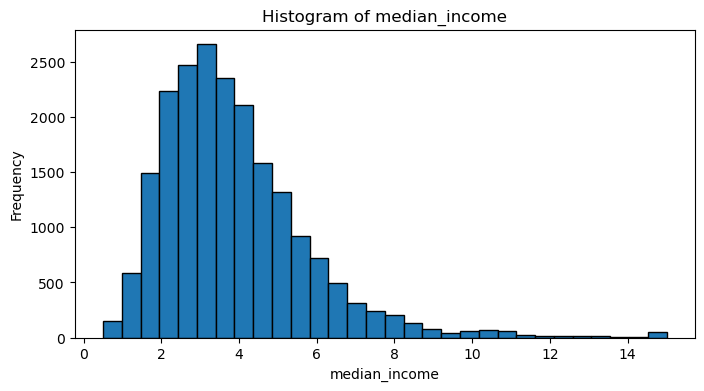

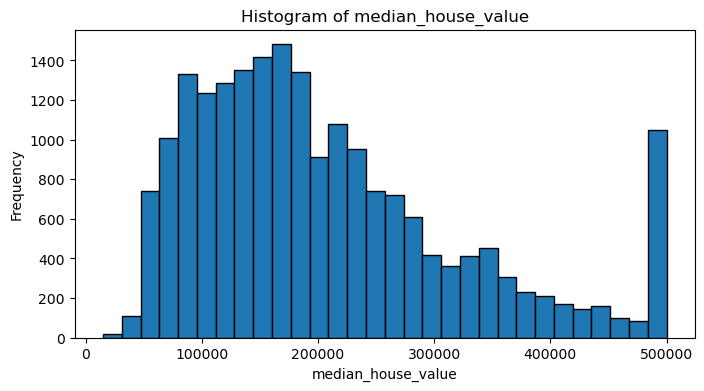

In [4]:
columns_to_visualize = housing_df.columns

columns_to_visualize = columns_to_visualize.drop('ocean_proximity')

# Loop through each column and create a scatter plot
for column in columns_to_visualize:
    plt.figure(figsize=(8, 4))
    
    plt.hist(housing_df[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

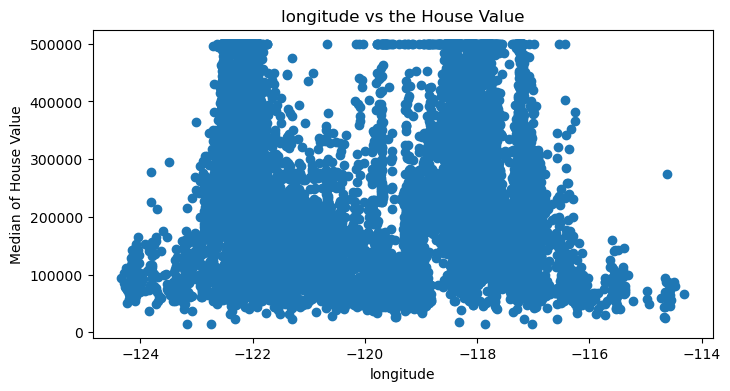

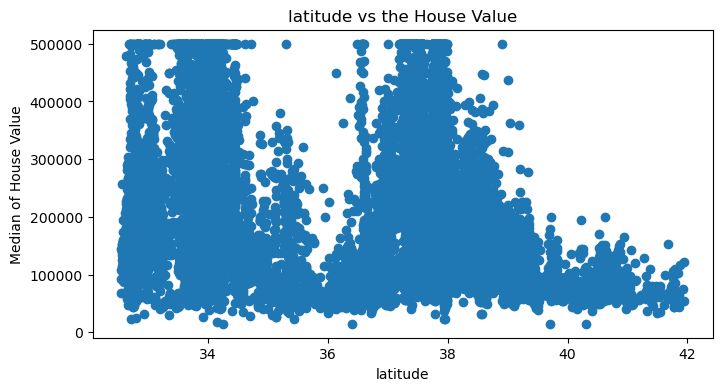

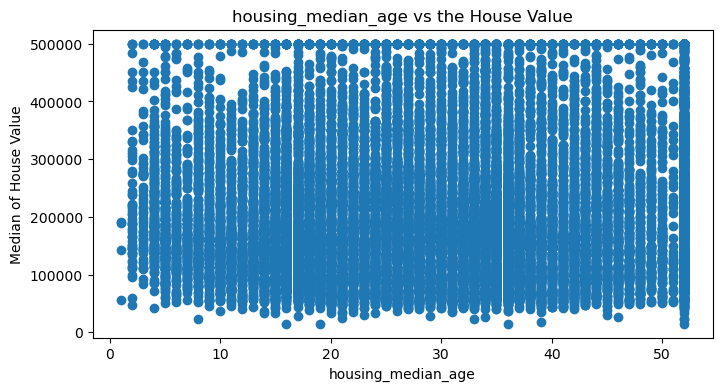

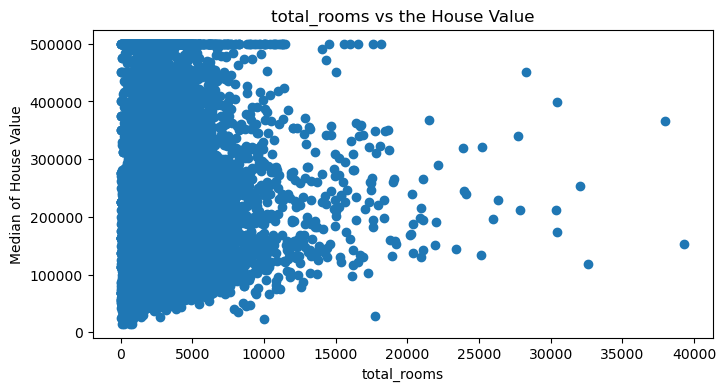

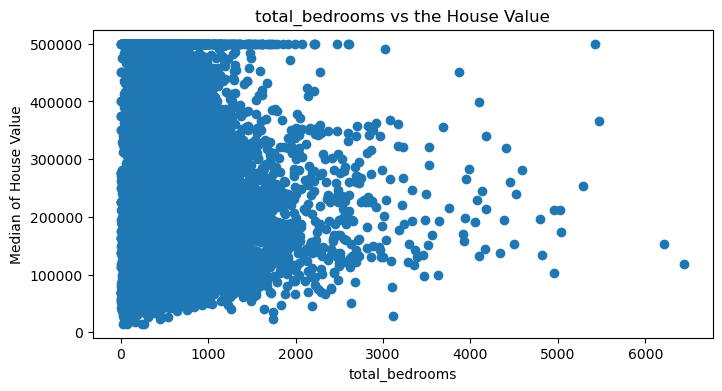

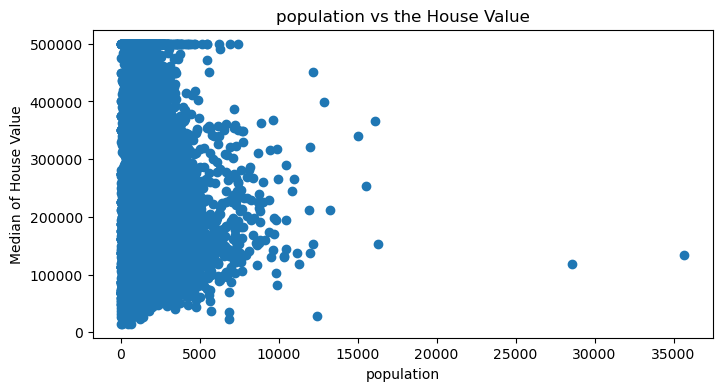

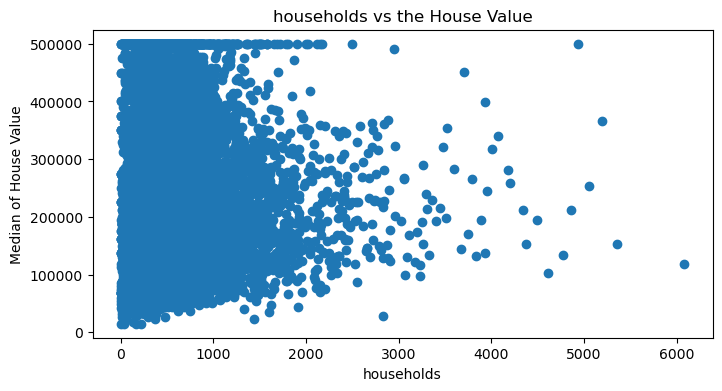

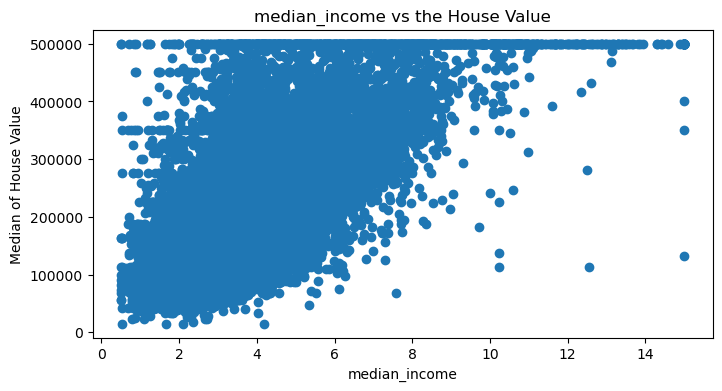

In [5]:
columns_to_visualize = columns_to_visualize.drop('median_house_value')
for column in columns_to_visualize:
    plt.figure(figsize=(8, 4))
    plt.scatter(housing_df[column], housing_df['median_house_value'])
    plt.title(f'{column} vs the House Value')
    plt.xlabel(f'{column}')
    plt.ylabel("Median of House Value")
    plt.show()

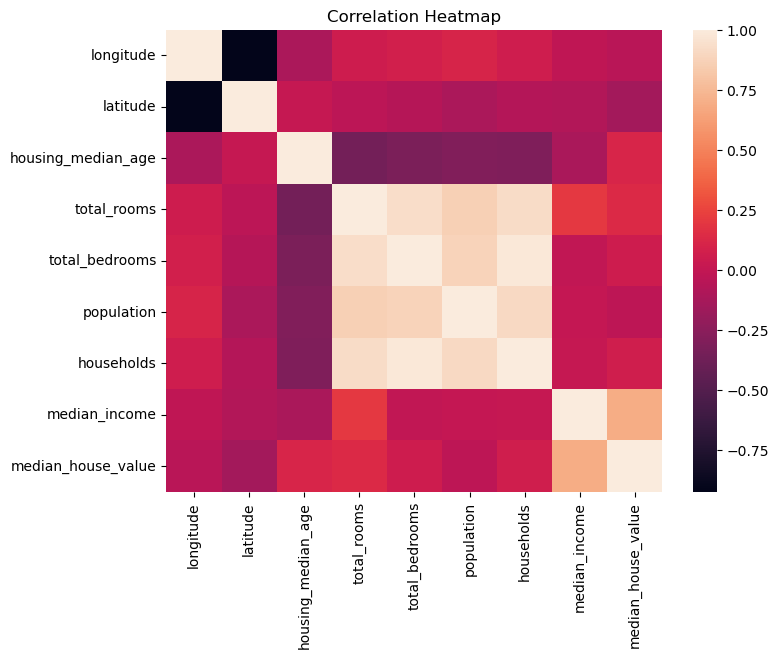

In [6]:
correlation_matrix = housing_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix)

plt.title('Correlation Heatmap')

plt.show()

# The heatmap indicates total_rooms, total_bedrooms, population, and households are related with each other.
# It is totally normal because when the houses have more bedrooms,
# more people will live in that district and this will increase the amount of household and population.
# Also it seems there is relationship between median_income and median_house_value. I think if a place is expensive, 
# people who have better income stay there.

## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

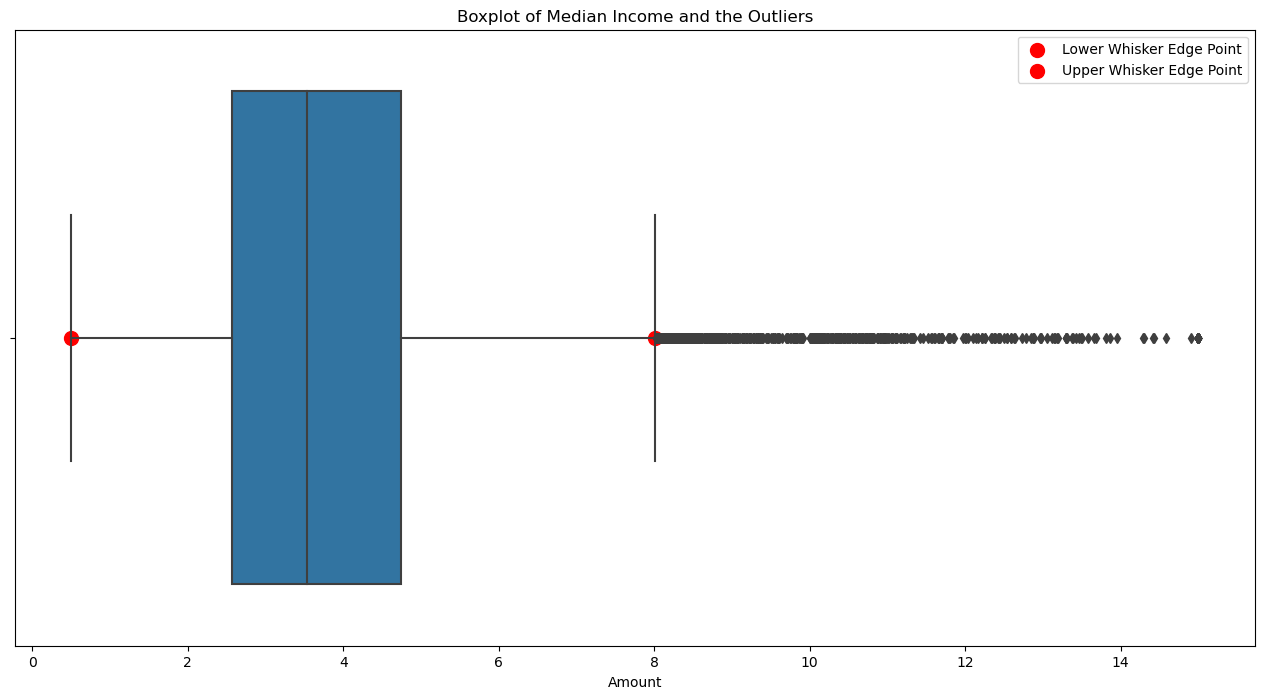

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
131,-122.19,37.84,18.0,1617.0,210.0,533.0,194.0,11.6017,392600.0,NEAR BAY
134,-122.19,37.83,28.0,1326.0,184.0,463.0,190.0,8.2049,335200.0,NEAR BAY
135,-122.20,37.83,26.0,1589.0,223.0,542.0,211.0,8.4010,351200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20428,-118.83,34.23,6.0,8803.0,1114.0,3385.0,1010.0,8.7288,425800.0,<1H OCEAN
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


In [7]:
# I chose IQR method because most of the features are right-skewed data or they have heavy tail.
# "The IQR represents the middle 50% of the data. It is used as a robust measure of scale that is not influenced 
# by extremes or the shape of the distribution.", this was the description of IQR in the Lab5_2023.ipynb 
# and I thought this is good explanation why I chose IQR method.

# I will store outliers to use them outliers handling part.
outliers_list = []

# First Quartile (Lower Quartile) is number that between smallest number of dataset and median.
Q1 = housing_df['median_income'].quantile(0.25)
# Third Quartile (Upper Quartile) is number that between highest number of dataset and median.
Q3 = housing_df['median_income'].quantile(0.75)

# Interquartile range
IQR = Q3 - Q1

# Whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Create a boxplot
plt.figure(figsize=(16, 8))
boxplot = sns.boxplot(x=housing_df['median_income'], whis=1.5)

# Identify the whisker-edge points -outliers- within the dataset
whisker_edge_data = housing_df[(housing_df['median_income'] >= lower_whisker) & (housing_df['median_income'] <= upper_whisker)]

# Find the points that are closest to the whiskers
lower_whisker_point = whisker_edge_data['median_income'].min()
upper_whisker_point = whisker_edge_data['median_income'].max()

# Mark the whisker-edge points
plt.scatter([lower_whisker_point], [0], color='red', s=100, label='Lower Whisker Edge Point')
plt.scatter([upper_whisker_point], [0], color='red', s=100, label='Upper Whisker Edge Point')

plt.legend()

plt.title('Boxplot of Median Income and the Outliers')
plt.xlabel('Amount')
plt.show()

# The histogram of median_income have already indicated, median_income is right-skewed.
outliers_median_income = housing_df[(housing_df['median_income'] < lower_whisker) | (housing_df['median_income'] > upper_whisker)]
outliers_list.append(['median_income',lower_whisker, upper_whisker])
outliers_median_income

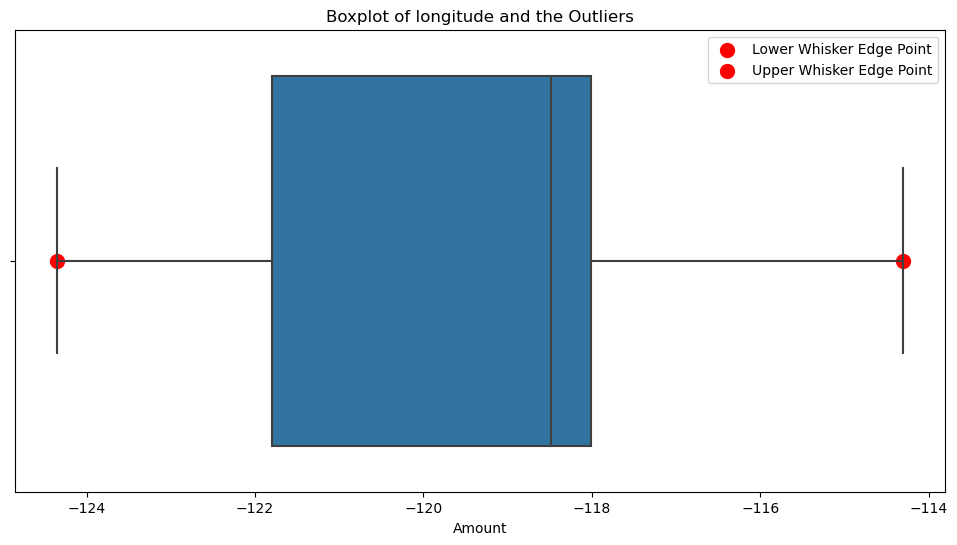

Series([], Name: longitude, dtype: float64)


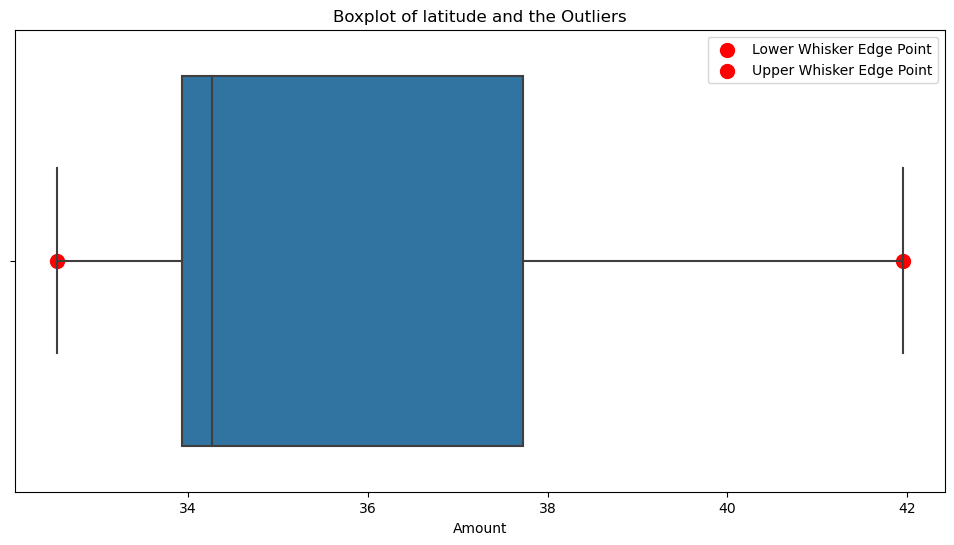

Series([], Name: latitude, dtype: float64)


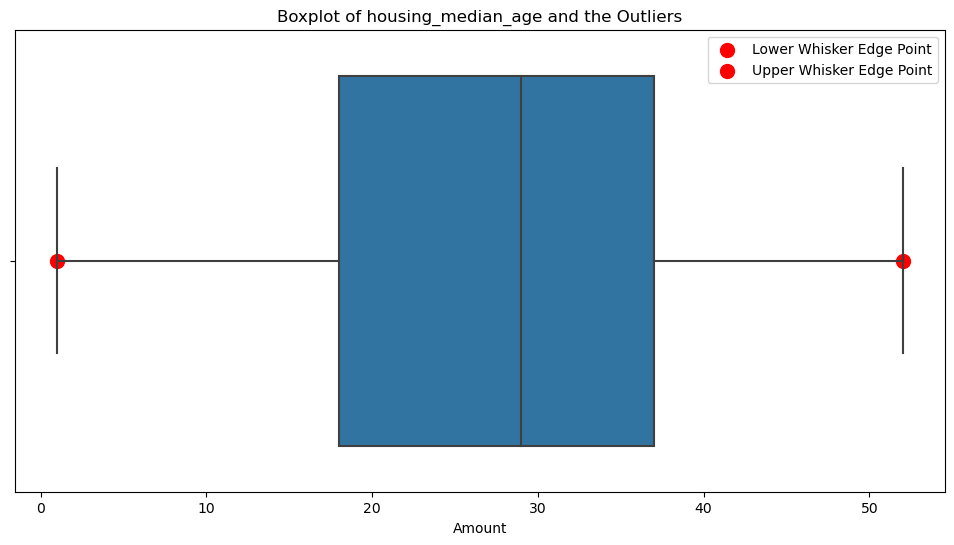

Series([], Name: housing_median_age, dtype: float64)


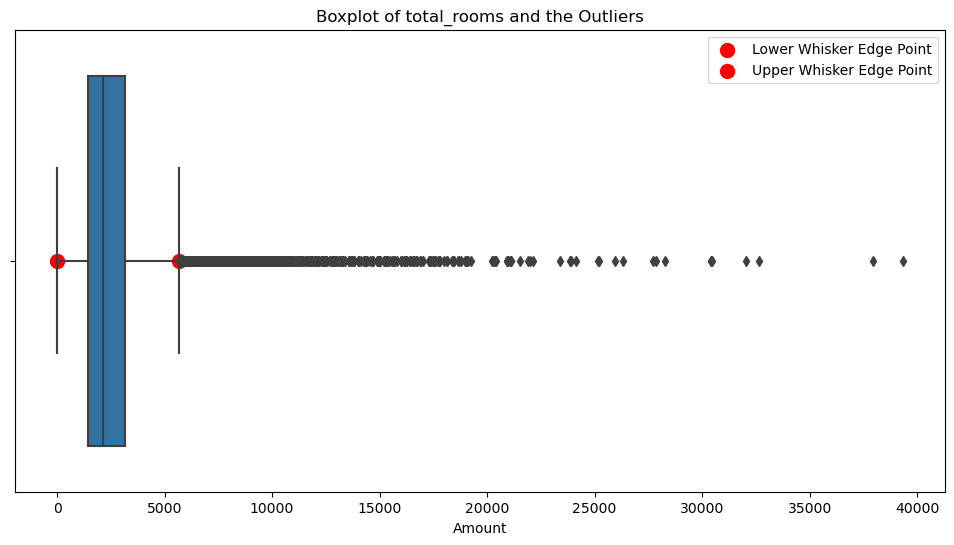

1         7099.0
101       5806.0
104       5871.0
185       5963.0
283      12842.0
          ...   
20543     6861.0
20544     8800.0
20563    12139.0
20567     6809.0
20629    10035.0
Name: total_rooms, Length: 1290, dtype: float64


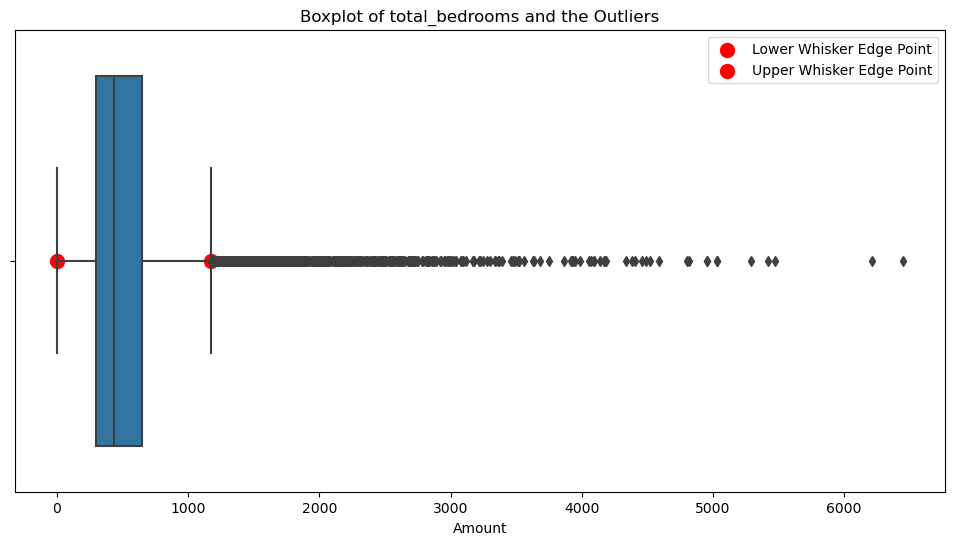

95       2477.0
96       1331.0
98       1270.0
100      1414.0
101      1603.0
          ...  
20539    1516.0
20543    1820.0
20544    1857.0
20563    2640.0
20629    1856.0
Name: total_bedrooms, Length: 1271, dtype: float64


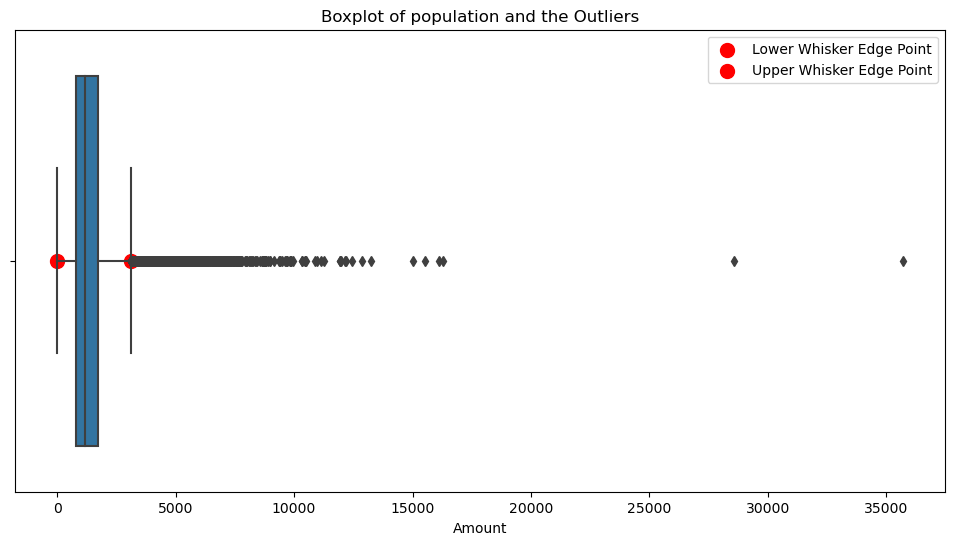

95       3469.0
185      4367.0
283      4985.0
460      3337.0
485      3276.0
          ...  
20543    3717.0
20544    6330.0
20563    6837.0
20604    3265.0
20629    6912.0
Name: population, Length: 1190, dtype: float64


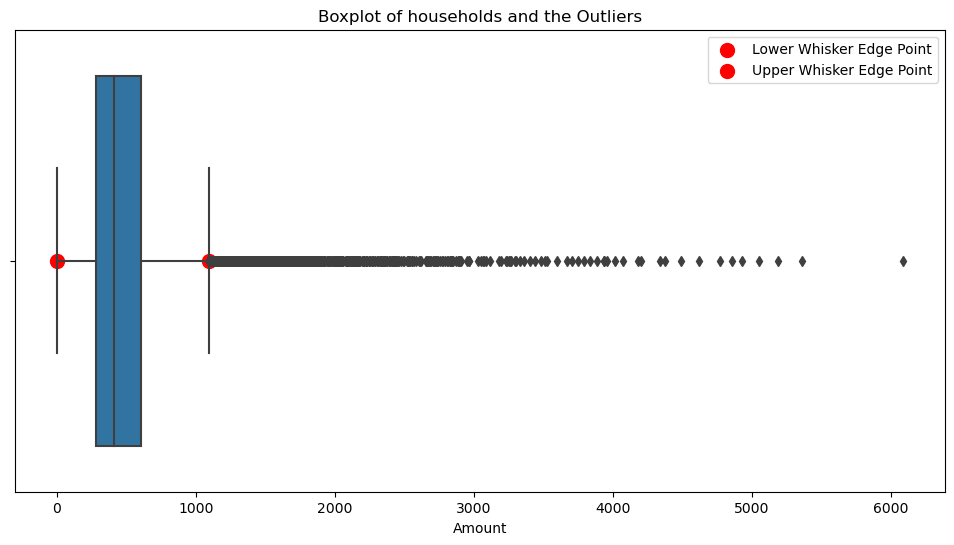

1        1138.0
95       2323.0
96       1180.0
98       1250.0
100      1250.0
          ...  
20541    1115.0
20543    1767.0
20544    1832.0
20563    2358.0
20629    1818.0
Name: households, Length: 1210, dtype: float64


In [8]:
columns_to_visualize = columns_to_visualize.drop('median_income')
for column in columns_to_visualize:
    Q1 = housing_df[column].quantile(0.25)
    Q3 = housing_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    plt.figure(figsize=(12, 6))
    boxplot = sns.boxplot(x=housing_df[column], whis=1.5)
    whisker_edge_data = housing_df[(housing_df[column] >= lower_whisker) & (housing_df[column] <= upper_whisker)]
    lower_whisker_point = whisker_edge_data[column].min()
    upper_whisker_point = whisker_edge_data[column].max()
    plt.scatter([lower_whisker_point], [0], color='red', s=100, label='Lower Whisker Edge Point')
    plt.scatter([upper_whisker_point], [0], color='red', s=100, label='Upper Whisker Edge Point')
    plt.legend()
    plt.title(f'Boxplot of {column} and the Outliers')
    plt.xlabel('Amount')
    plt.show()
    outliers = housing_df[(housing_df[column] < lower_whisker) | (housing_df[column] > upper_whisker)]
    # I add outliers to use it outliers handling
    if (not outliers.empty):
        outliers_list.append([column, lower_whisker, upper_whisker])
    print(outliers[column])

In [9]:
# Looks like longitude, latitude and housing_median_age don't have outliers.
# However this doesn't apply to others. 

## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

In [10]:
df_median_imputed = housing_df.copy()
df_mean_imputed = housing_df.copy()
df_outlier_removed = housing_df.copy()
for column_name, lower_whis, upper_whis in outliers_list:
    df_median_imputed.loc[df_median_imputed[column_name] > upper_whis, column_name] = df_median_imputed[column_name].median()
    df_median_imputed.loc[df_median_imputed[column_name] < lower_whis, column_name] = df_median_imputed[column_name].median()
    df_mean_imputed.loc[df_mean_imputed[column_name] > upper_whis, column_name] = df_mean_imputed[column_name].mean()
    df_mean_imputed.loc[df_mean_imputed[column_name] < lower_whis, column_name] = df_mean_imputed[column_name].mean()
    df_outlier_removed = df_outlier_removed[(df_outlier_removed[column_name] >= lower_whis) & 
                                            (df_outlier_removed[column_name] <= upper_whis)]

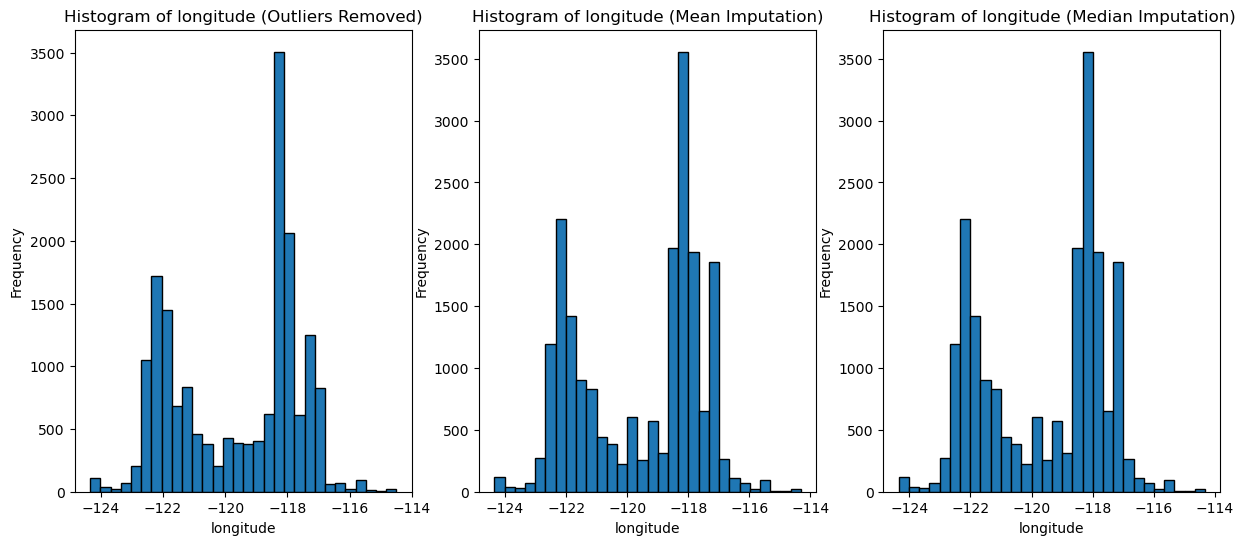

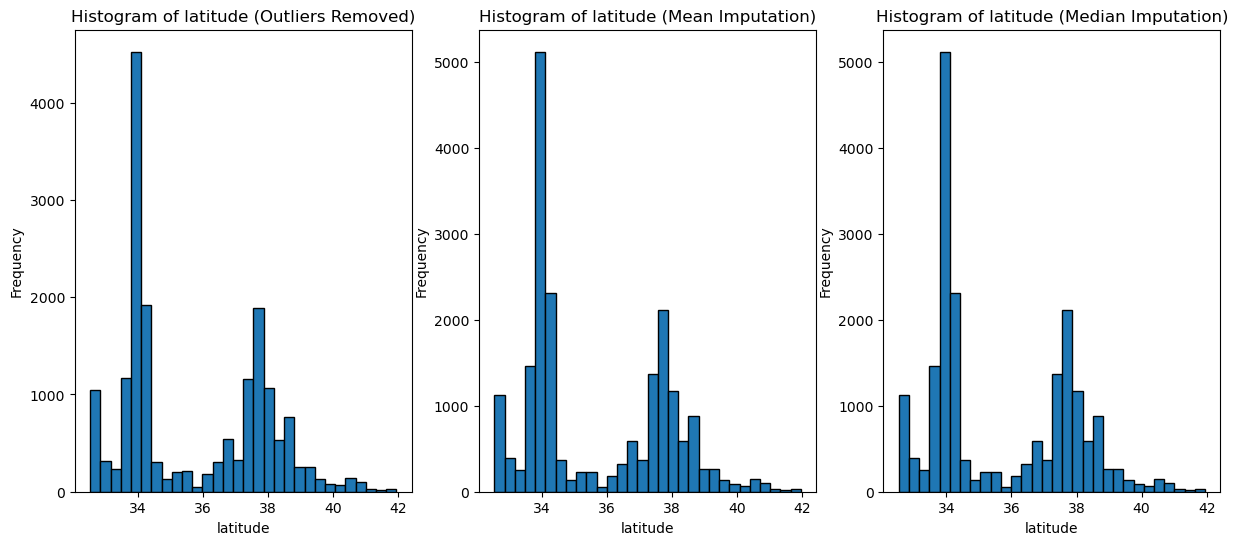

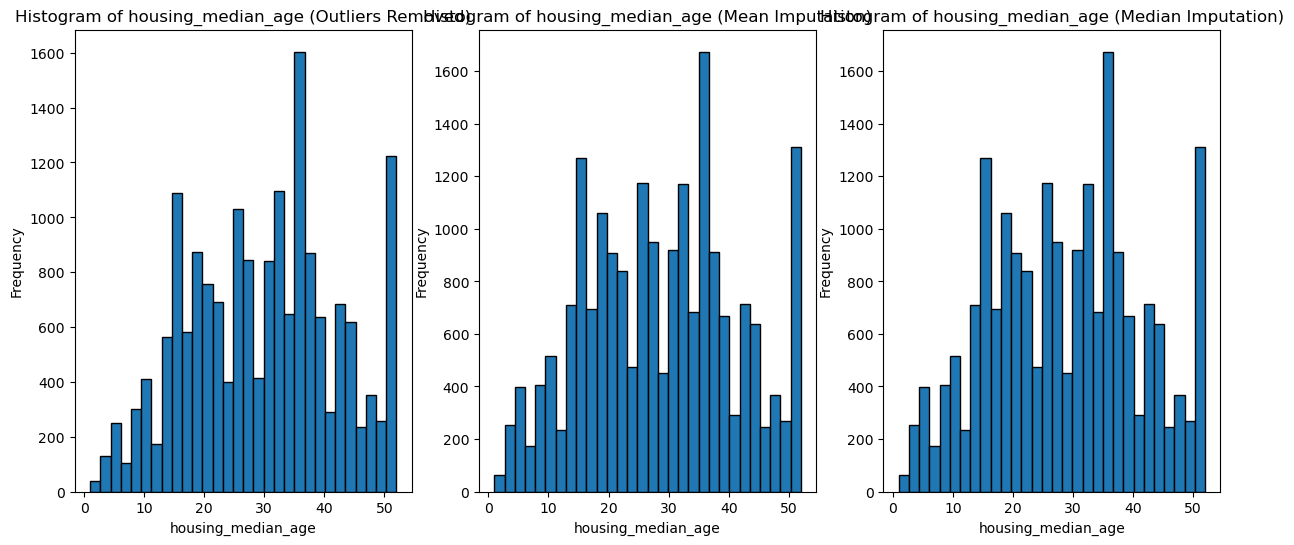

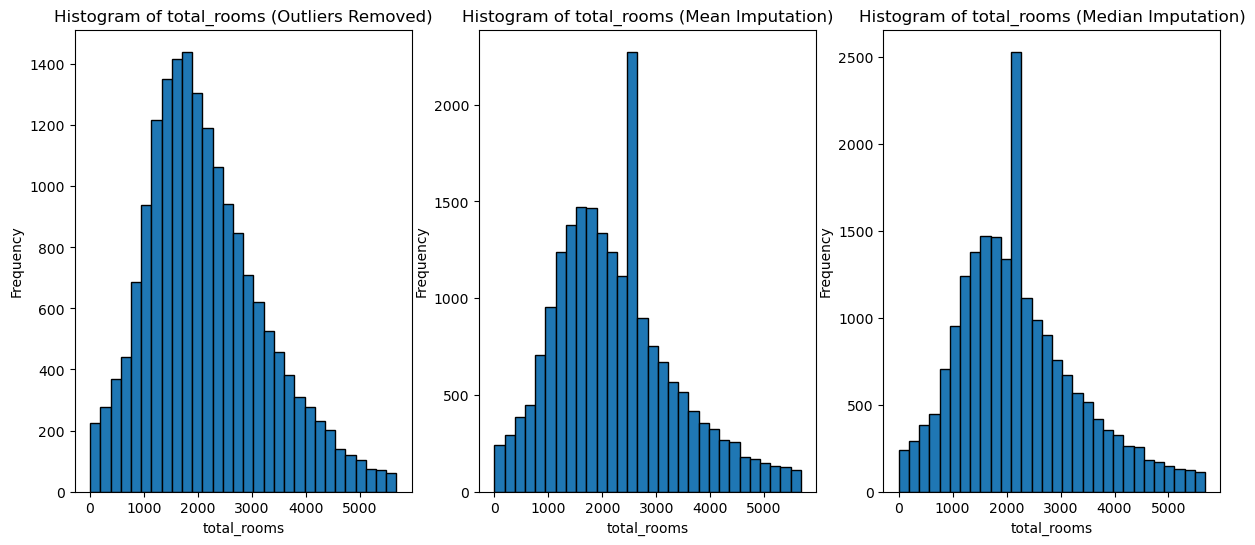

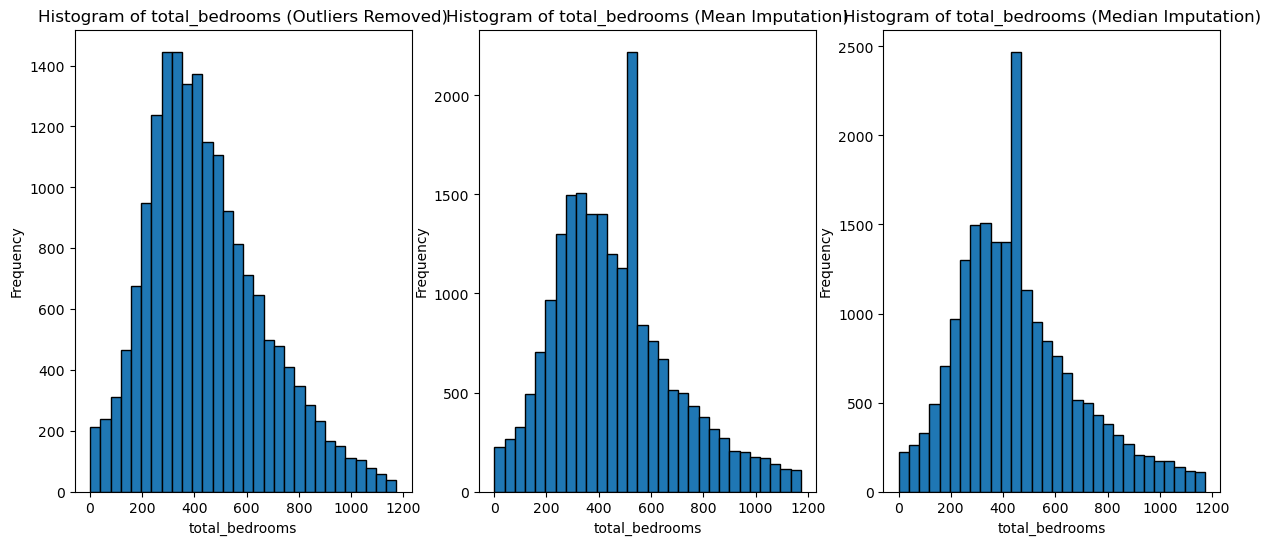

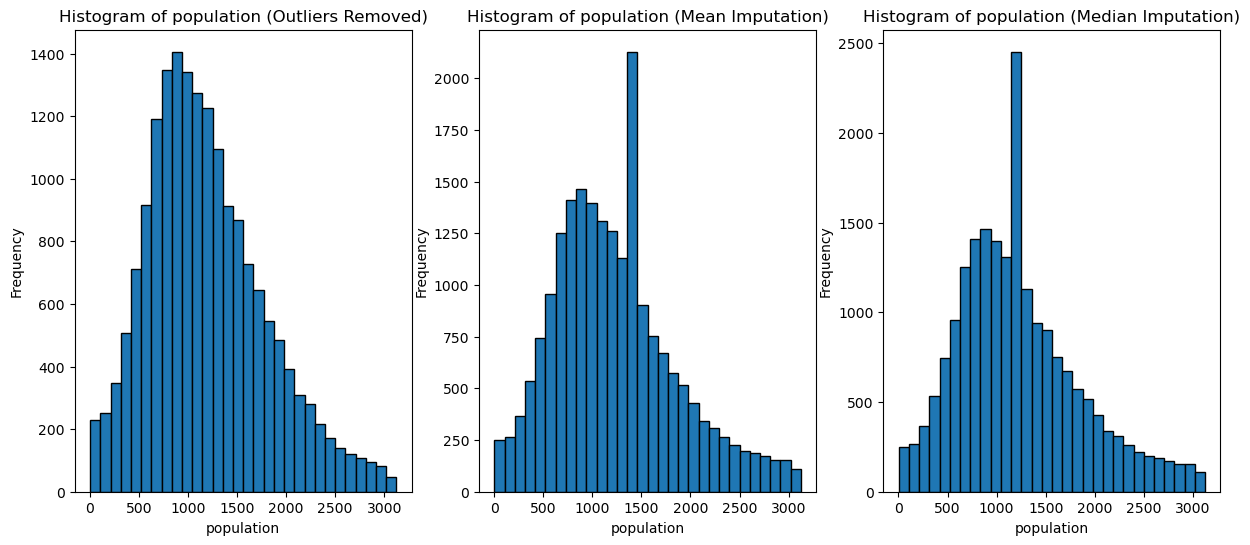

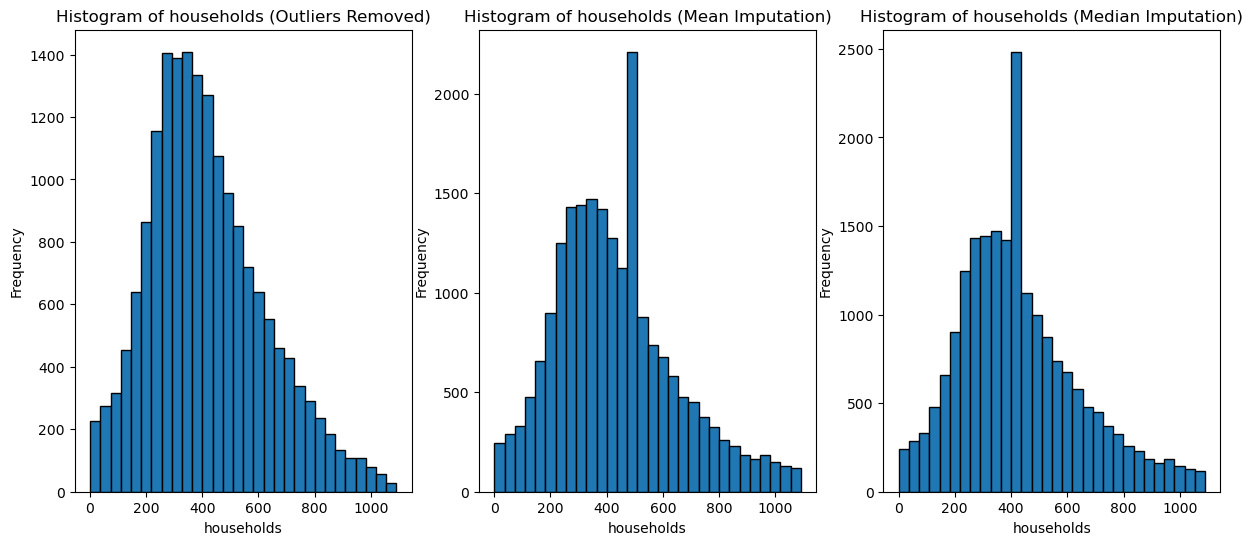

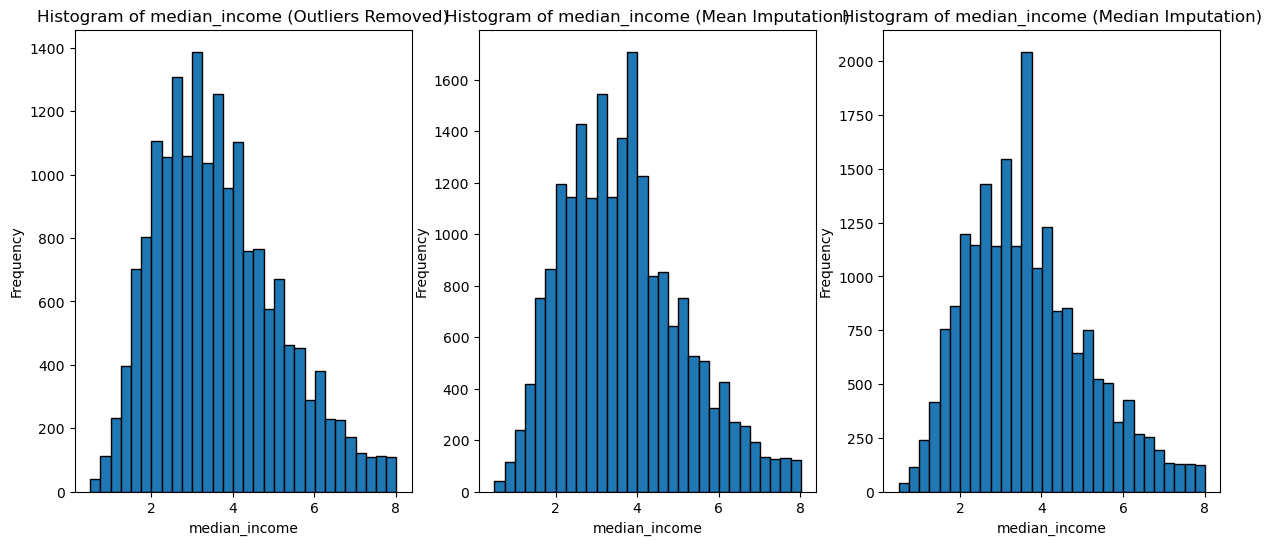

In [11]:
columns_to_visualize = housing_df.columns
columns_to_visualize = columns_to_visualize.drop(['ocean_proximity', 'median_house_value'])
for column in columns_to_visualize:

    plt.figure(figsize=(20, 6))
    plt.subplot(1, 4, 2)
    plt.hist(df_outlier_removed[column], bins=30, edgecolor = 'black')
    plt.title(f'Histogram of {column} (Outliers Removed)')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.subplot(1, 4, 3)
    plt.hist(df_mean_imputed[column], bins=30, edgecolor = 'black')
    plt.title(f'Histogram of {column} (Mean Imputation)')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.subplot(1, 4, 4)
    plt.hist(df_median_imputed[column], bins=30, edgecolor = 'black')
    plt.title(f'Histogram of {column} (Median Imputation)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show() 

## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

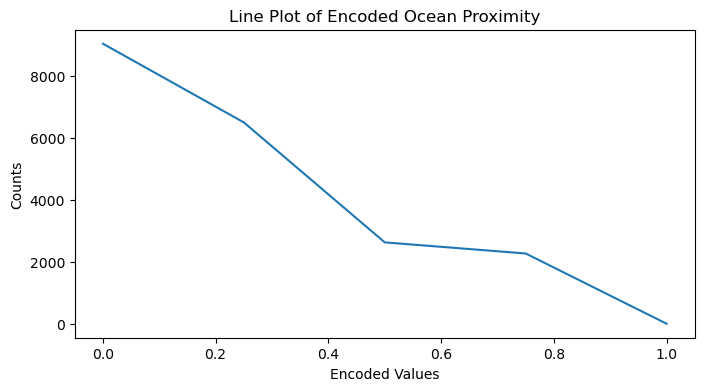

In [12]:
# Firstly I give them numbers 1 to 5 then I rescaled them based on min-max scaling (x-x_min)/(x_max - x_min)
mapping = {"<1H OCEAN": 0, "INLAND": 0.25, "NEAR OCEAN": 0.5, "NEAR BAY": 0.75, "ISLAND": 1}


housing_df['ocean_proximity'] = housing_df['ocean_proximity'].map(mapping)
df_outlier_removed['ocean_proximity'] = df_outlier_removed['ocean_proximity'].map(mapping)
df_mean_imputed['ocean_proximity'] = df_mean_imputed['ocean_proximity'].map(mapping)
df_median_imputed['ocean_proximity'] = df_median_imputed['ocean_proximity'].map(mapping)

counts = housing_df['ocean_proximity'].value_counts()

plt.figure(figsize=(8, 4))
plt.plot(counts.index, counts)
plt.title('Line Plot of Encoded Ocean Proximity')
plt.xlabel('Encoded Values')
plt.ylabel('Counts')
plt.show() 

## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split." (8 Pts)

You  cannot use scikit-learn's shuffle.

In [13]:
housing_df_shuffled = housing_df.sample(frac=1, random_state=5)

X = housing_df_shuffled.drop('median_house_value', axis=1)
y = housing_df_shuffled['median_house_value']

length_of_data = len(housing_df_shuffled)
train_size = int(0.7 * length_of_data)

train_set = housing_df_shuffled[:train_size]
test_set = housing_df_shuffled[train_size:]

train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13189,-117.71,34.08,29.0,1276.0,283.0,1216.0,316.0,2.5972,134300.0,0.25
10889,-117.90,33.70,15.0,2289.0,686.0,982.0,634.0,4.5757,162500.0,0.00
16068,-122.49,37.75,48.0,2181.0,419.0,1041.0,379.0,3.7361,320200.0,0.50
15525,-117.05,33.14,16.0,4552.0,1166.0,2737.0,1051.0,2.2500,136300.0,0.00
9194,-119.51,37.32,14.0,362.0,78.0,88.0,39.0,3.5893,214300.0,0.25
...,...,...,...,...,...,...,...,...,...,...
2206,-119.88,36.83,2.0,4055.0,735.0,1730.0,654.0,4.2132,96500.0,0.25
2030,-119.74,36.72,25.0,3972.0,842.0,2863.0,729.0,2.1304,58500.0,0.25
16417,-121.27,37.88,43.0,968.0,249.0,664.0,240.0,1.6458,83600.0,0.25
4411,-118.25,34.09,52.0,104.0,20.0,32.0,17.0,3.7500,241700.0,0.00


In [14]:
test_set

#At the beginning of assignment, 207 rows have been dropped. Therefore length of dataframe looks correct.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5412,-118.44,34.01,41.0,1309.0,221.0,534.0,228.0,5.1708,418800.0,0.00
15232,-117.21,33.02,26.0,3194.0,454.0,1032.0,406.0,10.1560,500001.0,0.50
19738,-122.34,40.32,12.0,3848.0,689.0,2008.0,683.0,2.6352,92200.0,0.25
8912,-118.49,34.02,30.0,2075.0,687.0,1026.0,592.0,3.1635,366700.0,0.00
20247,-119.26,34.27,42.0,918.0,204.0,394.0,204.0,4.0069,214300.0,0.50
...,...,...,...,...,...,...,...,...,...,...
1038,-120.93,38.50,15.0,1248.0,234.0,529.0,216.0,3.3393,107200.0,0.25
5577,-118.30,33.84,37.0,1241.0,226.0,621.0,255.0,4.9196,232400.0,0.00
3070,-119.25,35.79,8.0,3271.0,797.0,2700.0,688.0,1.7418,62200.0,0.25
18817,-120.48,39.66,32.0,1516.0,289.0,304.0,131.0,1.8839,71000.0,0.25


# 2. REGRESSION (50 Pts)
* Target value: median_house_value
* Predictors: The rest

## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:"
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Predict the test set and calculate the MSE value for each k. Plot the MSE vs k curve to decide on the optimal k. Additionally, report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?

You can use scikit-learn's KNeighborsRegressor.

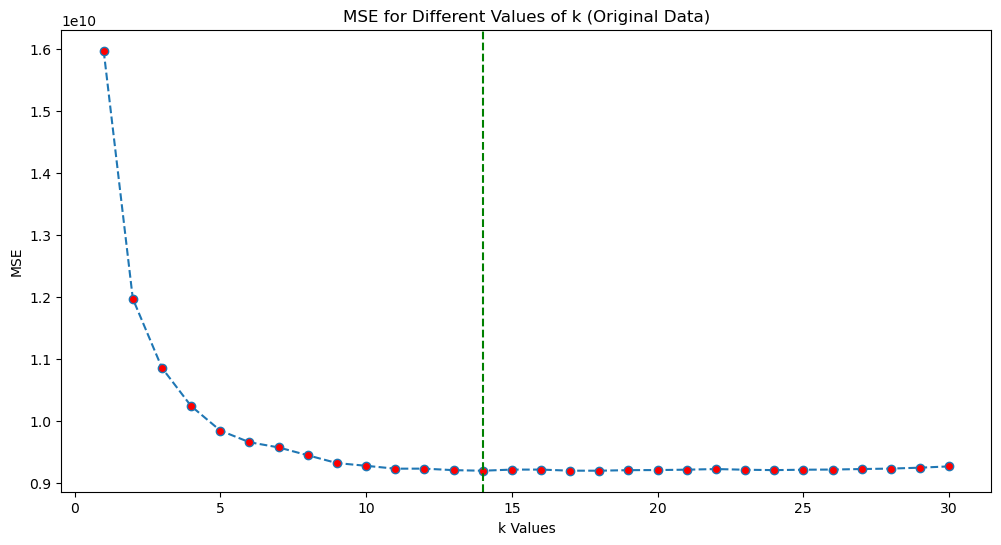

(Original Data) R-squared is for k=14:  0.29627385287468244
(Original Data) MSE is for k=14:  9199902839.744915


In [15]:
import sklearn
from sklearn.neighbors import KNeighborsRegressor

k_values = list(range(1, 31))
mse_values_original = []
r2_values_original = []

# Shuffle the dataset
housing_df_shuffled = housing_df.sample(frac=1, random_state=5)

# Select target variable and features for original data
X_original = housing_df_shuffled.drop('median_house_value', axis=1)
y_original = housing_df_shuffled['median_house_value']

# Define train size for dataset
train_size_original = int(0.7 * len(housing_df_shuffled))

# Define training and testing sets
X_train_original = X_original[:train_size_original]
X_test_original = X_original[train_size_original:]
y_train_original = y_original[:train_size_original]
y_test_original = y_original[train_size_original:]

for k in k_values:
    # Original data
    knn_original = KNeighborsRegressor(n_neighbors=k)
    
    knn_original.fit(X_train_original, y_train_original)
    
    predictions_original = knn_original.predict(X_test_original)
    
    # MSE calculation for original data
    mse_original = ((y_test_original - predictions_original) ** 2).sum() / len(y_test_original)
    mse_values_original.append(mse_original)
    
    # R-squared calculation for original data 
    # I chose r-squared value from list after found the optimal k value.
    sum_of_squared_residuals = ((y_test_original - predictions_original) ** 2).sum()
    mean_of_y_test = y_test_original.mean()
    total_sum_of_squares = ((y_test_original - mean_of_y_test) ** 2).sum()
    r2_original = 1 - (sum_of_squared_residuals/total_sum_of_squares)
    r2_values_original.append(r2_original)
    
optimal_k = k_values[np.argmin(mse_values_original)]    
# Plotting MSE (Original Data)
plt.figure(figsize=(12, 6))
plt.plot(k_values, mse_values_original, linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('MSE for Different Values of k (Original Data)')
plt.axvline(x=optimal_k, color='green', linestyle='dashed')
plt.xlabel('k Values')
plt.ylabel('MSE')
plt.show()

print(f"(Original Data) R-squared is for k={optimal_k}: ", r2_values_original[np.argmin(mse_values_original)])
print(f"(Original Data) MSE is for k={optimal_k}: ", mse_values_original[np.argmin(mse_values_original)])

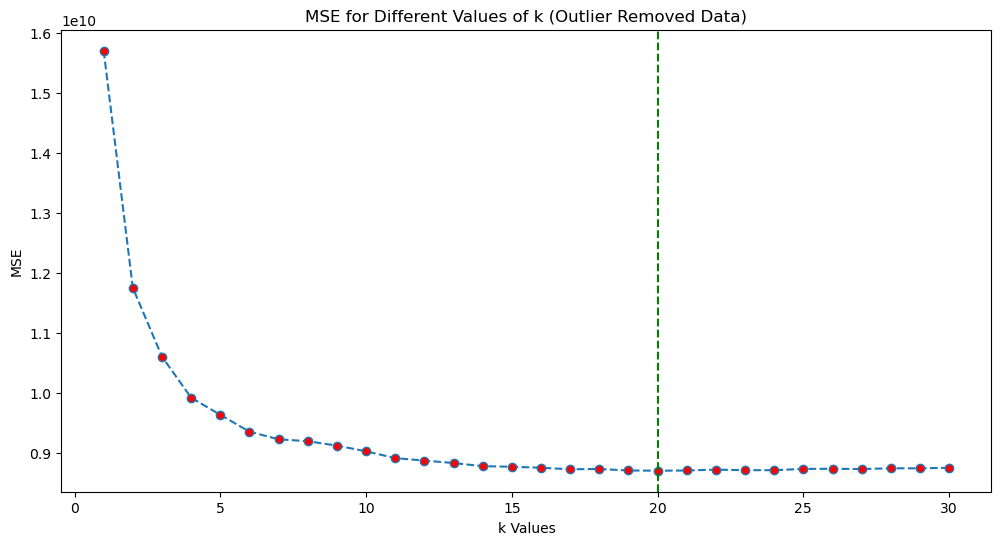

(Outliers Removed Data) R-squared is for k=20:  0.24039301063517127
(Outliers Removed Data) MSE is for k=20:  8711444768.432833


In [16]:
mse_values_removed = []
r2_values_removed = []

# Shuffle the dataset
shuffled_df_removed = df_outlier_removed.sample(frac=1, random_state=13)

# Select target variable and features for outlier removed data
X_removed = shuffled_df_removed.drop('median_house_value', axis=1)
y_removed = shuffled_df_removed['median_house_value']

# Define train size for dataset
train_size_removed = int(0.7 * len(shuffled_df_removed))

# Define training and testing sets
X_train_removed = X_removed[:train_size_removed]
X_test_removed = X_removed[train_size_removed:]
y_train_removed = y_removed[:train_size_removed]
y_test_removed = y_removed[train_size_removed:]

for k in k_values:
    # Outliers removed data
    knn_removed = KNeighborsRegressor(n_neighbors=k)
    
    knn_removed.fit(X_train_removed, y_train_removed)
    
    predictions_removed = knn_removed.predict(X_test_removed)
    
    # MSE calculation for outliers removed data
    mse_removed = ((y_test_removed - predictions_removed) ** 2).sum() / len(y_test_removed)
    mse_values_removed.append(mse_removed)
    
    # R-squared calculation for outlier removed data 
    sum_of_squared_residuals = ((y_test_removed - predictions_removed) ** 2).sum()
    mean_of_y_test = y_test_removed.mean()
    total_sum_of_squares = ((y_test_removed - mean_of_y_test) ** 2).sum()
    r2_removed = 1 - (sum_of_squared_residuals/total_sum_of_squares)
    r2_values_removed.append(r2_removed)

optimal_k = k_values[np.argmin(mse_values_removed)]    
# Plotting MSE (Outlier Removed Data)
plt.figure(figsize=(12, 6))
plt.plot(k_values, mse_values_removed, linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('MSE for Different Values of k (Outlier Removed Data)')
plt.axvline(x=optimal_k, color='green', linestyle='dashed')
plt.xlabel('k Values')
plt.ylabel('MSE')
plt.show()  

# I took k = 15 from this graph
print(f"(Outliers Removed Data) R-squared is for k={optimal_k}: ", r2_values_removed[np.argmin(mse_values_removed)])
print(f"(Outliers Removed Data) MSE is for k={optimal_k}: ", mse_values_removed[np.argmin(mse_values_removed)])

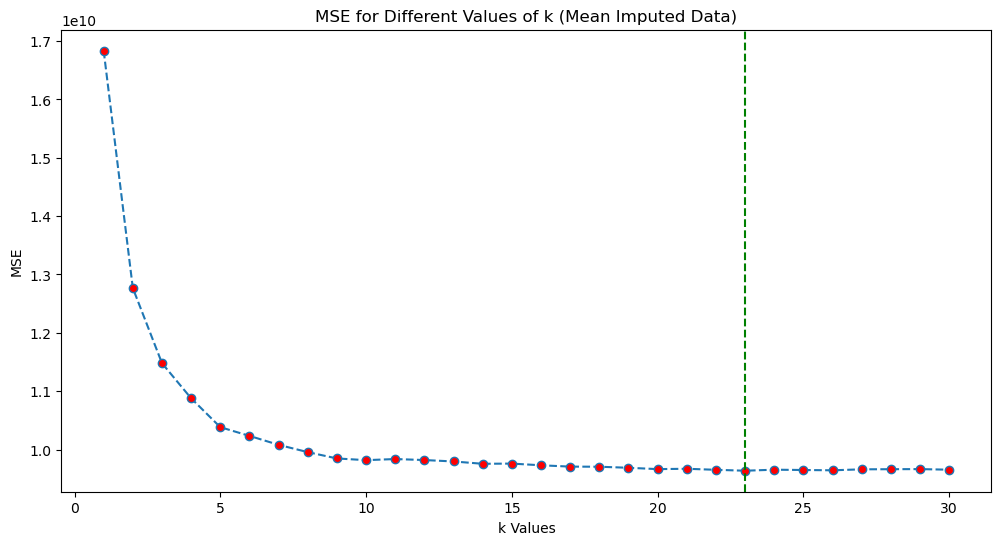

(Mean Imputed Data) R-squared is for k=23:  0.29569643556520464
(Mean Imputed Data) MSE is for k=23:  9637729326.926783


In [17]:
mse_values_mean = []
r2_values_mean = []

# Shuffle the dataset
shuffled_df_mean = df_mean_imputed.sample(frac=1, random_state=24)

# Select target variable and features for mean imputed data
X_mean = shuffled_df_mean.drop('median_house_value', axis=1)
y_mean = shuffled_df_mean['median_house_value']

# Define train size for dataset
train_size_mean = int(0.7 * len(shuffled_df_mean))

# Define training and testing sets
X_train_mean = X_mean[:train_size_mean]
X_test_mean = X_mean[train_size_mean:]
y_train_mean = y_mean[:train_size_mean]
y_test_mean = y_mean[train_size_mean:]

for k in k_values:
    # Outliers mean imputed data
    knn_mean = KNeighborsRegressor(n_neighbors=k)
    
    knn_mean.fit(X_train_mean, y_train_mean)
    
    predictions_mean = knn_mean.predict(X_test_mean)
    
    # MSE calculation for mean imputed data
    mse_mean = ((y_test_mean - predictions_mean) ** 2).sum() / len(y_test_mean)
    mse_values_mean.append(mse_mean)
    
    # R-squared calculation for mean_imputed data 
    sum_of_squared_residuals = ((y_test_mean - predictions_mean) ** 2).sum()
    mean_of_y_test = y_test_mean.mean()
    total_sum_of_squares = ((y_test_mean - mean_of_y_test) ** 2).sum()
    r2_mean = 1 - (sum_of_squared_residuals/total_sum_of_squares)
    r2_values_mean.append(r2_mean)
    
optimal_k = k_values[np.argmin(mse_values_mean)]     
# Plotting MSE (Mean Imputed Data)
plt.figure(figsize=(12, 6))
plt.plot(k_values, mse_values_mean, linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('MSE for Different Values of k (Mean Imputed Data)')
plt.axvline(x=optimal_k, color='green', linestyle='dashed')
plt.xlabel('k Values')
plt.ylabel('MSE')
plt.show()

# I took k = 22 from this graph
print(f"(Mean Imputed Data) R-squared is for k={optimal_k}: ", r2_values_mean[np.argmin(mse_values_mean)])
print(f"(Mean Imputed Data) MSE is for k={optimal_k}: ", mse_values_mean[np.argmin(mse_values_mean)])

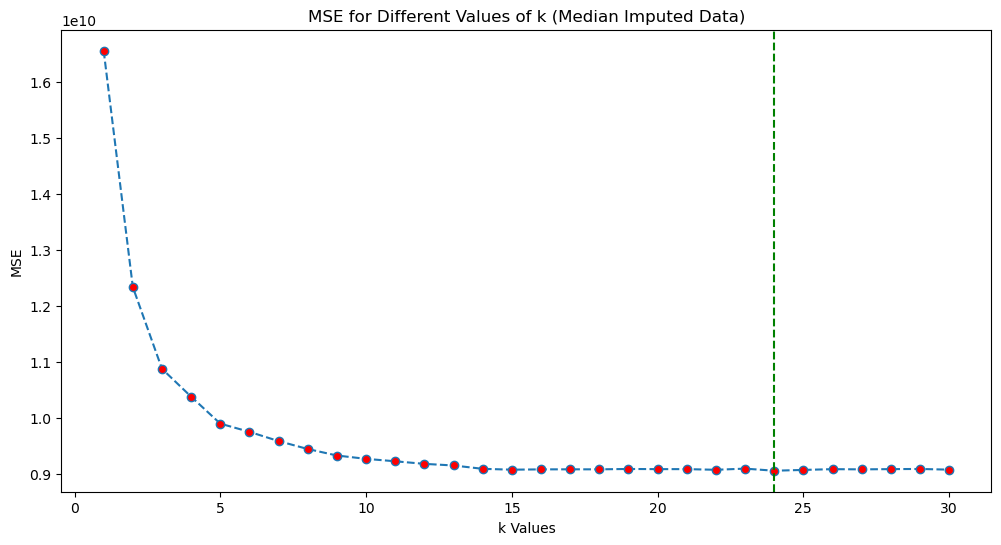

(Median Imputed Data) R-squared is for k=24:  0.29810200109666685
(Median Imputed Data) MSE is for k=24:  9063130298.229008


In [18]:
mse_values_median = []
r2_values_median = []

# Shuffle the dataset
shuffled_df_median = df_median_imputed.sample(frac=1, random_state=7)

# Select target variable and features for median imputed data
X_median = shuffled_df_median.drop('median_house_value', axis=1)
y_median = shuffled_df_median['median_house_value']

# Define train size for dataset
train_size_median = int(0.7 * len(shuffled_df_median))

# Define training and testing sets
X_train_median = X_median[:train_size_median]
X_test_median = X_median[train_size_median:]
y_train_median = y_median[:train_size_median]
y_test_median = y_median[train_size_median:]


for k in k_values:
    # Outliers median imputed data
    knn_median = KNeighborsRegressor(n_neighbors=k)
    
    knn_median.fit(X_train_median, y_train_median)
    
    predictions_median = knn_median.predict(X_test_median)
    
    # MSE calculation for mean imputed data
    mse_median = ((y_test_median - predictions_median) ** 2).sum() / len(y_test_median)
    mse_values_median.append(mse_median)
    
    # R-squared calculation for mean_imputed data 
    sum_of_squared_residuals = ((y_test_median - predictions_median) ** 2).sum()
    y_test_mean = y_test_median.mean()
    total_sum_of_squares = ((y_test_median - mean_of_y_test) ** 2).sum()
    r2_median = 1 - (sum_of_squared_residuals/total_sum_of_squares)
    r2_values_median.append(r2_median)
    
optimal_k = k_values[np.argmin(mse_values_median)]         
# Plotting MSE (Median Imputed Data)
plt.figure(figsize=(12, 6))
plt.plot(k_values, mse_values_median, linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('MSE for Different Values of k (Median Imputed Data)')
plt.axvline(x=optimal_k, color='green', linestyle='dashed')
plt.xlabel('k Values')
plt.ylabel('MSE')
plt.show()    

# I took k = 26 from this graph
print(f"(Median Imputed Data) R-squared is for k={optimal_k}: ", r2_values_median[np.argmin(mse_values_median)])
print(f"(Median Imputed Data) MSE is for k={optimal_k}: ", mse_values_median[np.argmin(mse_values_median)])

In [19]:
# I think median imputed data gives the best result because it has the greatest r-square value.

## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following:
    * Split the data into train and test sets
    * Fit a linear regression model to train data. Predict the test set and calculate the MSE value.

In [20]:
from sklearn.linear_model import LinearRegression


# Shuffle the dataset
housing_df_shuffled = housing_df.sample(frac=1, random_state=5)

# Select target variable and features for original data
X_original = housing_df_shuffled.drop('median_house_value', axis=1)
y_original = housing_df_shuffled['median_house_value']

# Define train size for dataset
train_size_original = int(0.7 * len(housing_df_shuffled))

# Define training and testing sets
X_train_original = X_original[:train_size_original]
X_test_original = X_original[train_size_original:]
y_train_original = y_original[:train_size_original]
y_test_original = y_original[train_size_original:]

reg_lin_original = LinearRegression()

reg_lin_original.fit(X_train_original, y_train_original)

predictions_lin_original = reg_lin_original.predict(X_test_original)

mse_original = ((y_test_original - predictions_lin_original) ** 2).sum() / len(y_test_original)
print(f"Mean Squared Error (MSE) for Original Data: {mse_original}")

Mean Squared Error (MSE) for Original Data: 4776363655.356544


In [21]:
# Shuffle the dataset
shuffled_df_removed = df_outlier_removed.sample(frac=1, random_state=13)

# Select target variable and features for outlier removed data
X_removed = shuffled_df_removed.drop('median_house_value', axis=1)
y_removed = shuffled_df_removed['median_house_value']

# Define train size for dataset
train_size_removed = int(0.7 * len(shuffled_df_removed))

# Define training and testing sets
X_train_removed = X_removed[:train_size_removed]
X_test_removed = X_removed[train_size_removed:]
y_train_removed = y_removed[:train_size_removed]
y_test_removed = y_removed[train_size_removed:]

reg_lin_removed = LinearRegression()

reg_lin_removed.fit(X_train_removed, y_train_removed)

predictions_lin_removed = reg_lin_removed.predict(X_test_removed)

mse_removed = ((y_test_removed - predictions_lin_removed) ** 2).sum() / len(y_test_removed)
print(f"Mean Squared Error (MSE) for Qutlier Removed Data: {mse_removed}")

Mean Squared Error (MSE) for Qutlier Removed Data: 4410516817.166723


In [22]:
# Shuffle the dataset
shuffled_df_mean = df_mean_imputed.sample(frac=1, random_state=24)

# Select target variable and features for mean imputed data
X_mean = shuffled_df_mean.drop('median_house_value', axis=1)
y_mean = shuffled_df_mean['median_house_value']

# Define train size for dataset
train_size_mean = int(0.7 * len(shuffled_df_mean))

# Define training and testing sets
X_train_mean = X_mean[:train_size_mean]
X_test_mean = X_mean[train_size_mean:]
y_train_mean = y_mean[:train_size_mean]
y_test_mean = y_mean[train_size_mean:]

reg_lin_mean = LinearRegression()

reg_lin_mean.fit(X_train_mean, y_train_mean)

predictions_lin_mean = reg_lin_mean.predict(X_test_mean)

mse_mean = ((y_test_mean - predictions_lin_mean) ** 2).sum() / len(y_test_mean)
print(f"Mean Squared Error (MSE) for Mean Imputed Data: {mse_mean}")

Mean Squared Error (MSE) for Mean Imputed Data: 6738706278.502644


In [23]:
# Shuffle the dataset
shuffled_df_median = df_median_imputed.sample(frac=1, random_state=7)

# Select target variable and features for median imputed data
X_median = shuffled_df_median.drop('median_house_value', axis=1)
y_median = shuffled_df_median['median_house_value']

# Define train size for dataset
train_size_median = int(0.7 * len(shuffled_df_median))

# Define training and testing sets
X_train_median = X_median[:train_size_median]
X_test_median = X_median[train_size_median:]
y_train_median = y_median[:train_size_median]
y_test_median = y_median[train_size_median:]

reg_lin_median = LinearRegression()

reg_lin_median.fit(X_train_median, y_train_median)

predictions_lin_median = reg_lin_median.predict(X_test_median)

mse_median = ((y_test_median - predictions_lin_median) ** 2).sum() / len(y_test_median)
print(f"Mean Squared Error (MSE) for Median Imputed Data: {mse_median}")

Mean Squared Error (MSE) for Median Imputed Data: 6870275429.071771


In [24]:
# I think outlier removed data gives the best result for linear regression

## 2.3. Compare the Regression Methods (10 Pts)

Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.). Discuss the strengths and limitations of each model based on your results

I think linear regression is better for original data. Because there are too many outliers in the data and knn is a local estimator based on the neighborhood, so some seeds may choose that will cause a miscalculation. 

For outliers removed data, I think knn regression is better. 

For mean imputed data, knn regression may be more accurate. Because linear regression will look all data to predict and outliers changed with mean value. Therefore predicts can be close to the mean value.
I think same thing about median imputed data too.

In brief, I think knn may be better for data with few outliers and linear regression may be preferable For data with irrelevant features.

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **MAKE USE OF THEM RESPONSIBLY**. That is, you can utilize them to enhance understanding and support your original work, **not to replace it**. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.

# REFERENCES
[1] Nugent, C. (n.d.). California Housing Prices [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/camnugent/california-housing-prices